<a href="https://colab.research.google.com/github/ektakum13/Advance-House-Price-Prediction/blob/main/House_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#display all the columns of the dataframe

pd.pandas.set_option("display.max_columns", None)

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/train_House Price prediction.csv")

In [ ]:
df_test =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/test_house Price prediction.csv")

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_test.shape


(1459, 80)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
pd.pandas.set_option('display.max_rows',None)

In [ ]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<Axes: >

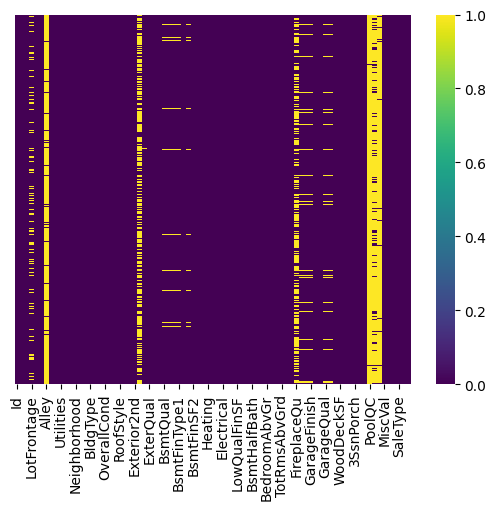

In [ ]:
sns.heatmap(df_train.isnull(), yticklabels=False , cmap='viridis')

**Handling Missing Values**

In [ ]:
# Drop the columns having more than 50% of missing values
train_features_with_na = [features for features in df_train.columns if df_train[features].isnull().sum()>730]
test_features_with_na = [features for features in df_test.columns if df_test[features].isnull().sum()>730]

In [ ]:
train_features_with_na

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
df_train = df_train.drop(columns=train_features_with_na + ['FireplaceQu', 'Id'], axis=1)

In [ ]:
df_train.shape

(1460, 74)

In [ ]:
df_test.shape


(1459, 80)

Handle the missing values less than 50% my imputation

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
#filling missing values in training dataset
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
# Since LotFrontage is numerical column

In [ ]:
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtCond']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical']=df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['GarageFinish ']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

<Axes: >

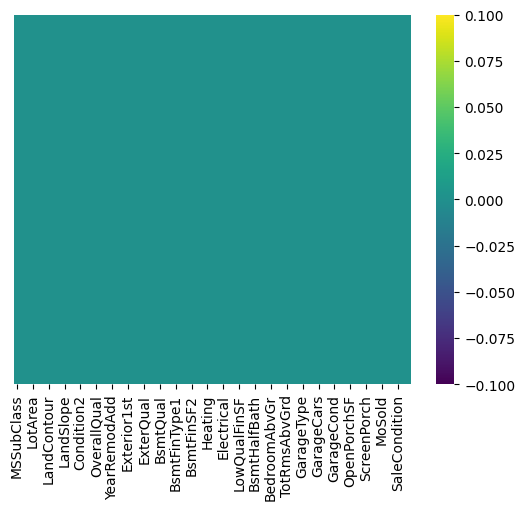

In [ ]:
sns.heatmap(df_train.isnull(), yticklabels=False , cmap='viridis')

In [ ]:
df_train.shape

(1340, 75)

In [ ]:
df_train=df_train.dropna()

Dividing the dataset into categorical and numerical columns

In [ ]:
categorical_column=[]
for i in df_train.columns:
  if df_train[i].dtype=="object":
    categorical_column.append(i)


In [ ]:
numerical_column=[]
for i in df_train.columns:
  if df_train[i].dtype=="object":
    numerical_column.append(i)

In [ ]:
num_data= df_train.drop(columns=categorical_column)

In [ ]:
for i in num_data.columns:
  y= num_data['SalePrice'].corr(num_data[i])
  print(f"corr with is:",y)

corr with is: -0.08043069351393019
corr with is: 0.3281620791340976
corr with is: 0.25461900750884175
corr with is: 0.783712056425457
corr with is: -0.10894617929331565
corr with is: 0.504301523382038
corr with is: 0.5014195222549163
corr with is: 0.46633041031348205
corr with is: 0.36055697416164645
corr with is: -0.02870013984194613
corr with is: 0.19339048499585948
corr with is: 0.6000715047112694
corr with is: 0.6050560975328692
corr with is: 0.31018220659584145
corr with is: -0.010062909320997128
corr with is: 0.7114704213506473
corr with is: 0.21057855742088338
corr with is: -0.03034053325689818
corr with is: 0.5692934261479784
corr with is: 0.25687453467814436
corr with is: 0.16929041969350894
corr with is: -0.11146631597993643
corr with is: 0.5516716583253422
corr with is: 0.4456392351865617
corr with is: 0.48173201592605225
corr with is: 0.640610778817097
corr with is: 0.6081423293239963
corr with is: 0.30501514131517016
corr with is: 0.32192790025159723
corr with is: -0.12755

In [ ]:
#now we have to drop those columns which shows negative correlation with sales price
columns_removed=[]
for i in num_data.columns:
  if(num_data['SalePrice'].corr(num_data[i])<0.2):
    columns_removed.append(i)

In [ ]:
final_data=num_data.drop(columns=['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold'], axis=1)

In [ ]:
categorical_column

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'GarageFinish ']

In [ ]:
len(categorical_column)

38

In [ ]:
#one hot encoding
final_data = pd.get_dummies(df_train, columns =categorical_column)


In [ ]:
one_hot_encoded_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageFinish _Fin,GarageFinish _RFn,GarageFinish _Unf
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,True,False,False,False,False,True,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,True,False,False,False,False,True,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,True,False,False,False,False,True,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,True,True,False,False,False,False,False,False,False,True
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,True,False,False,False,False,True,False,False,True,False


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
x=final_data.drop(columns=['SalePrice'], axis=1)
y=final_data['SalePrice']

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
model_list =[LinearRegression, DecisionTreeRegressor, GradientBoostingRegressor, XGBRegressor]

In [ ]:
for model_class in model_list:
    model = model_class()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"the r2 of" ,model,'is', r2_score(y_pred, y_test))
    print('---------------------------------------')

the r2 of LinearRegression() is 0.8591688749668668
---------------------------------------
the r2 of DecisionTreeRegressor() is 0.7559870618159364
---------------------------------------
the r2 of GradientBoostingRegressor() is 0.8474691865884529
---------------------------------------
the r2 of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_